# PyTorch training loop and Testing loop

For the training loop, we'll build the following steps:

1. Forward pass
2. Calculate the loss
3. 	Zero gradients
4. Perform backpropagation on the loss
5. Update the optimizer (gradient descent)

In [1]:
import torch
import numpy as np
import seaborn as sns
from torch import nn

torch.manual_seed(42)

X = np.linspace(0,20,num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)

<Axes: >

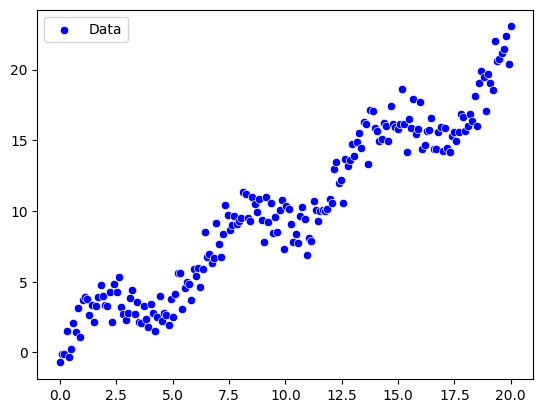

In [2]:
sns.scatterplot(x=X,y=y,color='Blue', label='Data')

In [3]:
from torch.utils.data import Dataset , DataLoader

class Simple1DRegressionDataset(Dataset):
    def __init__(self,X,y):
        super(Simple1DRegressionDataset,self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)

    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32) , torch.tensor(self.y[index,:],dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

In [4]:
df = Simple1DRegressionDataset(X,y)


In [5]:
df[0]


(tensor([0.]), tensor([-0.7123]))

In [6]:
training_loader = DataLoader(Simple1DRegressionDataset(X,y),shuffle=True)

In [7]:
data_point = next(iter(training_loader))
data_point


[tensor([[8.8442]]), tensor([[10.8299]])]

In [112]:
# construct the model using Linear block
in_features = 1
out_features = 1

# model_2 = nn.Linear(in_features,out_features)

model_2 = nn.Sequential(
    nn.Linear(1, 256),
    nn.ReLU(),
    nn.Linear(256, 256),
    nn.ReLU(),
    nn.Linear(256, 256),
    nn.ReLU(),
    nn.Linear(256, 256),
    nn.ReLU(),
    nn.Linear(256, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
    )



In [113]:
loss_fn = nn.MSELoss()

In [114]:
optimizer = torch.optim.Adam(params=model_2.parameters(),lr=0.06)

In [115]:
# so we need now a training loop
from tqdm.autonotebook import tqdm

def train_simple_network(model,
                        loss_fn,
                        training_loader,
                        epochs=5,
                        device='cpu',
                        optimizer=optimizer):

    optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epochs"):

        model = model.train()

        running_loss = 0

        for inputs , labels in tqdm(training_loader,desc='Batches'):

            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            y_pred = model(inputs)

            loss = loss_fn(y_pred, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()
            print(running_loss)



In [116]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [117]:
train_simple_network(model_2,
                loss_fn,
                training_loader,
                device=device,
                epochs=40
                )


Epochs:   0%|          | 0/40 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

16.448318481445312
66.51568222045898
567.0699424743652
680.2586860656738
718.9305877685547
814.3656997680664
976.1188583374023
986.0500421524048
1080.0013513565063
1089.6244583129883
1097.487551689148
1131.862998008728
1382.9264287948608
1451.8113470077515
1618.0642919540405
1620.0666155815125
1624.5525722503662
1712.18922996521
1931.154348373413
2017.877965927124
2073.821252822876
2522.4368534088135
2804.849390029907
2805.008040085435
3097.072767868638
3137.557139053941
3240.132952347398
3499.9605585485697
3516.4663874059916
3543.178043976426
3633.7180448919535
3638.453138485551
3859.326902523637
4103.847181454301
4328.41914190352
4365.945760861039
4371.8676277548075
4382.802120819688
4384.197113528848
4537.741226688027
4546.054490581155
4547.507115378976
4549.331267252564
4555.373117819428
4576.585806265473
4580.830386534333
4650.05488909781
4650.253975778818
4650.595479547977
4778.530507624149
4968.100667536259
5159.808995783329
5167.324336588383
5437.664424479008
5761.38509708643
5

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

63.853050231933594
202.03803253173828
395.34146881103516
398.56779313087463
789.9122755527496
966.4900190830231
1017.9535810947418
1177.0545027256012
1342.1818678379059
1640.8117201328278
1688.3821737766266
1688.9814711213112
2029.8389540314674
2181.804225027561
2183.171591937542
2208.035968005657
2210.4557887911797
2268.581063449383
2547.121651828289
2635.2946559786797
2664.795407474041
2813.302273929119
3027.9893772006035
3054.281460940838
3054.3514260575175
3190.770707063377
3194.5129198357463
3239.703879766166
3404.2020334526896
3404.477601967752
3510.5759524926543
3639.454492531717
3645.3781776055694
3647.263960443437
3754.278494440019
3754.9023232087493
3837.0982384309173
3856.9373230561614
3868.2699417695403
3992.970465146005
3997.8217153176665
4006.6704930886626
4040.886202774942
4040.92298457399
4295.003932449967
4460.856837723404
4896.874782059342
5013.350688431412
5013.356738494709
5053.6328806150705
5209.064704345539
5212.467877076939
5242.653626130894
5281.745014833286
529

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.137822389602661
27.01655125617981
204.44181370735168
233.10009503364563
267.9615261554718
337.2426006793976
360.9770863056183
435.8562443256378
441.3324205875397
453.1628620624542
523.738972902298
560.4037792682648
563.5138788223267
563.8857754170895
657.0775783956051
672.8823784291744
713.7478340566158
846.8134468495846
886.0239914357662
888.3207767903805
948.0395267903805
978.690901607275
1043.2980183064938
1044.963978856802
1103.051022619009
1120.3502341210842
1130.0500117242336
1133.127028554678
1160.3942976891994
1232.2978621423244
1283.2044173181057
1311.961199849844
1313.1373345553875
1346.6672303378582
1388.730775564909
1409.3817860782146
1433.282138556242
1502.6077382266521
1532.6957623660564
1557.1395222842693
1706.8583638370037
1748.262622565031
1798.9540478885174
1799.3233603537083
1853.47526922822
1854.8580425083637
1904.0057132542133
1960.1265819370747
1971.5010936558247
2025.3244960606098
2029.5442931950092
2031.78912332654
2060.6142652332783
2119.20326974988
2230.9492

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

114.4354476928711
124.99957847595215
158.90484809875488
233.0555362701416
264.66666412353516
283.3450012207031
295.91085052490234
333.75350189208984
347.59517192840576
347.6032964363694
389.5862332955003
404.42818561941385
470.5596706047654
482.99030224233866
527.7664176598191
547.8142787590623
550.0065409317613
572.3639036789536
575.7671872749925
599.7776795998216
602.5226682797074
626.2020830288529
636.3489660397172
672.6766561642289
673.7392654791474
673.8343026190996
697.6108490973711
698.3117915540934
708.3729640394449
723.623335018754
755.4523965269327
764.8263970762491
847.7931405454874
876.6865903288126
890.1289464384317
942.4015637785196
962.5820371061563
963.4752111583948
1017.3932562023401
1053.6287603527308
1078.2192220836878
1105.9058294445276
1114.1995210796595
1137.0327768474817
1138.594037309289
1138.6294321417809
1143.2423152327538
1185.8712367415428
1208.8420352339745
1287.9905566573143
1302.9792003035545
1303.2547047436237
1319.0220625698566
1326.5257342159748
1368.3

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

7.590362071990967
80.55554914474487
140.17037153244019
179.7783694267273
227.22927808761597
228.57681000232697
229.661949634552
236.40667629241943
241.66154384613037
276.97786235809326
281.46674823760986
295.3324451446533
385.57969093322754
386.7503092288971
388.8501434326172
400.61823177337646
405.5292453765869
410.1905426979065
410.36386331915855
441.65486177802086
475.24685701727867
475.2646833676845
491.57590925879776
537.3928953427821
537.4606170151383
567.7369327042252
573.4677533600479
587.9926509354264
616.333415934816
706.1779899094254
759.9196547959
759.9234839440323
793.7448264122941
819.3848277092911
843.7576552391984
856.6684037209488
858.1031392575242
897.9606793881394
908.7934716702439
950.4542420865037
961.6866191388108
999.3124660016038
1032.8450244427659
1044.6102078915574
1091.112901067827
1113.6578458310105
1122.5820744992234
1122.720616927836
1301.4394432217814
1341.5729499966837
1359.0198722989298
1360.229264727328
1360.2867813357152
1394.7725067385472
1408.278261

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

44.816566467285156
126.24205780029297
193.3578643798828
252.1280288696289
315.79825592041016
320.5010118484497
447.2244539260864
498.6885118484497
505.1550612449646
552.9646162986755
569.3906798362732
569.8086958825588
680.421649068594
697.3027964532375
703.4634324014187
714.3365689218044
744.863748639822
827.6173191964626
850.6684189736843
874.0899487435818
880.409430116415
883.9899140298367
999.917366117239
1050.5998001992702
1082.820041745901
1082.8665711805224
1163.7489564344287
1203.2746140882373
1206.2262935563922
1216.6849660798907
1293.4996786043048
1340.4400319978595
1503.621062271297
1503.62738770945
1515.2530285785906
1588.0197979877703
1610.5611931751482
1615.769342131447
1615.7695932351635
1649.5407724343822
1713.4021463357494
1878.3223428689525
1878.3756245673285
1879.5763320029364
1989.9087981284247
2030.8405684531317
2051.1626700461493
2101.6489752829657
2143.4751471579657
2144.411186307727
2208.952949613391
2274.613639921008
2275.6345014274702
2283.7931546867476
2346.3

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.3669437170028687
18.162084937095642
36.95609128475189
39.78861916065216
40.643806993961334
76.8185048699379
121.54570060968399
183.76350075006485
200.0797525048256
258.28479248285294
260.5259719491005
331.1470885872841
355.9022346138954
391.7121596932411
410.2870917916298
446.0315528512001
579.0163245797157
664.0848670601845
717.4303069710732
720.5053065419197
745.4990943074226
746.9711512923241
746.9798239767551
779.590316683054
780.9532827436924
834.5770963728428
846.8872512876987
849.6137310564518
929.2832485735416
974.3813015520573
976.0828416645527
977.1028708517551
977.4022613465786
1052.0333648622036
1110.7319770753384
1114.442147821188
1119.3476468026638
1119.4610743671656
1122.3944242149591
1123.2596068531275
1135.4650206714869
1136.929822459817
1161.7275576740503
1166.2087302356958
1177.099102512002
1178.5986935049295
1181.5594502836466
1235.7244893461466
1270.9871961027384
1315.7581845670938
1318.671073332429
1326.2781390100718
1326.3778913617134
1332.6626866459846
1352.24

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

59.32955551147461
112.1475944519043
140.28680229187012
193.58869743347168
217.5344181060791
218.1806721687317
237.65301179885864
237.7399372830987
242.2694668546319
246.10177323967218
258.2113637700677
268.4259233251214
274.10069224983454
305.036963917315
333.1760363355279
412.97323939949274
415.5245687738061
601.1273519769311
603.9871022477746
608.2199752107263
617.6788165345788
622.3151714578271
640.1313450112939
644.8340408578515
655.2725507989526
667.6175815835595
677.43861887604
680.2626046910882
959.9757394567132
974.4959850087762
974.6643140986562
981.3724225237966
987.3958376124501
999.4561231806874
1011.8773754313588
1023.6324432566762
1030.7579029276967
1037.9265468791127
1042.4404071047902
1254.4705889895558
1264.7998288348317
1279.6018126681447
1280.647886581719
1297.7317393496633
1341.30332595855
1396.3164790347219
1406.5261471942067
1414.7665284350514
1420.3222745135427
1524.1844342425466
1599.559426613152
1700.200021095574
1722.523595161736
1724.026979394257
1794.7570971

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

20.99645233154297
67.91270446777344
87.12273597717285
117.18083572387695
155.2670440673828
162.78838872909546
188.84051084518433
209.34486150741577
209.9549776315689
273.7015062570572
315.51520788669586
315.52086609462276
374.713008581195
434.77932327846065
462.43288200953975
475.6633602962829
500.37200897792354
519.1684300289489
535.4022728786804
545.7766577587463
546.4017224297859
572.8515934930183
573.0852039293386
583.5974348024465
688.1747663454153
693.3844726518728
812.12524108449
818.8044689134695
823.7591155008413
826.1831007436849
845.3695574239828
948.6027117208578
968.52385811368
1020.4339724020101
1023.4494801000692
1078.207017941866
1079.3517539934255
1083.1176023916341
1084.4811386303045
1084.5581169188954
1086.8201606334187
1106.8793895305134
1141.199423557613
1206.2772586406209
1292.4372394145466
1366.8820788920857
1383.620743519161
1394.1728446544148
1426.8838355601765
1435.2759339869954
1501.9954164088704
1518.0713574946858
1550.1276013911702
1584.7765729487874
1584.8

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

18.980892181396484
38.89103317260742
140.70810317993164
158.97585678100586
180.60647010803223
187.4548077583313
199.68806791305542
276.78746366500854
295.69509840011597
300.66993618011475
303.30739760398865
342.91646361351013
388.41780257225037
403.97287249565125
421.72743487358093
424.5914168357849
509.2584547996521
609.2768034934998
610.7966499328613
637.3607959747314
733.4440402984619
737.1670680046082
740.584370136261
743.674519777298
763.8056309223175
829.5888493061066
843.1948082447052
885.6619369983673
890.3862364292145
905.7338383197784
938.3656170368195
976.0888454914093
1013.4455006122589
1016.3857431411743
1054.5099382400513
1060.7970242500305
1070.7457585334778
1074.3851163387299
1082.5860793590546
1168.2695281505585
1210.3665435314178
1226.0417964458466
1228.5844168663025
1260.4522452354431
1285.1096091270447
1323.4089980125427
1327.328459739685
1331.8481225967407
1331.861389032565
1362.1510447179899
1520.4134195959195
1522.029164663516
1534.435598722659
1747.6734985029325

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

26.92472267150879
63.202341079711914
96.91637229919434
132.5285358428955
142.93177127838135
143.7924924492836
168.86052185297012
189.11540657281876
215.48923736810684
234.78448349237442
351.6707826256752
352.6206553578377
370.4528983235359
470.47109442949295
503.7977393269539
503.82262262515724
530.5461104791611
558.334446279332
574.1300939004868
646.808835355565
664.5164464395493
714.9568990152329
738.6196835916489
741.6772354524583
800.6514595430344
835.2760208528489
854.8346584718674
860.4510382097214
866.2019246499985
890.2775472085923
905.2859967630357
924.3002923410386
945.0432160776109
957.9763434808701
964.4205330293626
971.6651400011033
977.3493441026658
977.4948632549495
1064.8814217876643
1084.3296468090266
1125.236175281927
1184.2921674083918
1188.0102357696742
1203.676280958578
1222.6780700515956
1223.5075432490557
1288.0879723262042
1314.9683453273028
1317.402366084978
1318.0026992987841
1323.2638563346118
1323.9103442262858
1367.2426196169108
1373.281932933256
1382.79654

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

14.251838684082031
34.14545440673828
37.58016586303711
50.32054805755615
105.36760997772217
110.4443850517273
127.6846251487732
136.48464155197144
146.01736211776733
158.15021085739136
164.36552619934082
165.06078577041626
167.61384892463684
172.95118880271912
203.85840392112732
204.64992237091064
205.20775145292282
217.25946253538132
217.83717453479767
225.7204886674881
227.04141557216644
287.9670671224594
341.61876237392426
444.997233748436
497.4788011312485
501.9996155500412
506.58261573314667
514.4324773550034
519.4315894842148
519.4317209649162
519.4725413996057
540.3669925409631
542.176323600419
554.5460984188394
566.2018296200113
572.4040114361123
578.8703863102273
589.3359357792215
610.6201307255105
617.8687784153299
630.9014608341531
635.9259535747842
646.3075329738931
673.0556866604165
674.994200893052
681.4642912823037
684.1237112957315
692.7625567394571
694.7422824579553
694.9911574351863
713.1814784038143
767.7702578532771
776.8794316279964
790.8538788783626
793.6303385722

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.0370452404022217
32.39693903923035
39.12157940864563
85.24869656562805
96.41234517097473
119.29676938056946
130.33140206336975
130.33140614329386
133.77657749949503
139.73187878428507
143.1408298283677
148.26326158343363
163.99541738329935
175.40274694262553
289.6034305363755
289.7819574445348
298.4622505277257
315.88395958839465
316.08738659022856
316.6429095685344
324.7502923428874
367.2841172635417
368.97910849450636
379.2610632598262
386.52463166116286
387.81987861989546
408.65561775563765
413.5723686635356
430.3000412404399
440.07516769765425
457.0122995793681
457.0864903747897
457.10584371610094
458.29638605637956
463.1557300619643
472.5614173941176
480.56222229524064
481.8872560791533
482.09272530003
482.13700012563277
483.3563064753871
483.53891741930056
483.5395377360146
486.63640267475057
490.6414166174691
521.6705742560189
524.8737729273598
556.9632962427895
558.5787842951577
558.6390116333823
564.602485907064
575.5755779862266
602.7250893235068
615.3887465119224
636.68078

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.07976976782083511
4.99778763204813
36.71975723654032
38.07721773535013
41.53732196241617
42.703652776777744
45.23145381361246
45.25667750276625
45.4130179528147
46.97194846905768
46.9794548554346
102.88264928292483
110.83889661263674
110.89312909450382
118.32633088435978
118.37772153597325
121.36993120890111
126.15414475183934
129.18349646311253
129.3716662703082
129.67874808888882
186.62079902272671
249.4167089043185
267.8499421654269
281.764788585715
286.1927647171542
296.4034170685336
296.72098847012967
297.4430871186778
306.7840056596324
315.40664340835065
317.7116177259013
317.71898855734617
327.09887613821775
327.93500890303403
333.74607362318784
340.28715743590146
342.21044518519193
342.7978438930586
344.90242095757276
344.95694699604064
347.66212334949523
359.7551323445514
360.2050425680354
361.32016500551254
375.14206441957504
378.1544404895976
384.9327541263774
385.0328112291172
412.59852129686624
416.7483125375584
416.8865830199793
435.2908379333094
455.76912658382207
462.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.396945476531982
26.02214765548706
29.469515085220337
43.30011296272278
78.23495411872864
79.55439293384552
97.54475510120392
97.62041818350554
109.87145292013884
109.87239077338018
117.60310127981938
128.9700169826392
129.03795337327756
147.96794223436154
150.272679325426
162.34391975053586
162.90565895684995
162.9208037147764
175.32854144671
177.49488513567485
179.1157752762083
186.1377274284605
207.894778896356
216.0631539116148
219.76797931292094
234.82072990038432
253.93020026781596
308.8606163749937
321.1728998909239
321.1836910296697
331.21329784882255
337.41352510941215
358.8688778926153
369.36908483994193
372.0546240855474
383.7798848201055
393.66289091599174
437.38191938889213
447.2810530711431
447.78267252934165
473.6235004712362
475.44536042702384
476.55357397091575
479.6186312485952
485.40693557751365
485.548415889265
489.6542785067577
492.3729076285381
492.7739376623649
502.71399255585857
503.858408292057
507.27580579114147
507.80204065633006
522.3238054115791
535.835944

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

9.18786334991455
11.745887517929077
11.74591967303786
19.473419634890888
19.75898241837058
20.774289844823215
27.900583027196262
28.386164753032062
56.470233051371906
57.14653262336287
58.625437585902546
64.31466469008956
141.08702644546065
170.168962328029
176.2894447727922
177.25993403632674
177.65145838100943
177.97165298302207
178.22423404295478
178.2498660947058
181.0274859334204
181.3782204354975
181.399636784834
190.80633310441408
193.1676004326764
203.77065829400453
208.17497424249086
208.78856513862047
209.2643461323205
241.78320599560175
259.49472523693476
283.61767865185175
294.31403733257685
296.9875109291497
307.4287016487542
314.7761209106866
339.65909362797174
340.9614083862725
346.03985239033136
346.4122277594033
347.1521241164628
357.55411691431436
366.2880293822709
387.7132040954057
388.30847759012613
389.212552497429
396.36210293535623
405.46903176073465
410.3475355601731
418.8370356059495
418.9072764611665
456.9484561181489
564.4083636498872
591.6742728448335
616.18

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

8.828324317932129
9.125148802995682
11.01851537823677
12.19494441151619
20.223055869340897
23.817965537309647
30.277359038591385
35.12779954075813
38.66478231549263
40.66973665356636
44.98811033368111
49.11324241757393
57.03702476620674
63.50722101330757
63.56100049242377
67.33250298723578
67.66882437095046
77.62988966330886
80.77932923659682
82.78529661521316
82.94664878770709
86.73038501664996
92.18123407289386
94.07526142522693
95.6319423429668
101.99786956235766
102.98697788640857
111.46764213964343
111.4993884600699
115.89095616713166
121.29892659559846
122.171111587435
132.13106966391206
158.47383737936616
160.16100740805268
161.72667158022523
163.70718098059297
169.9996438063681
171.4763697423041
172.05866462364793
173.54312831535935
173.6109691672027
173.633573314175
176.7159891333431
215.92559911869466
216.05382989905775
218.60185789130628
218.80420840345323
219.37080997787416
220.48544401489198
222.44044465385377
230.48832005821168
230.55138543061912
241.31030610017478
241.67

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.03529971465468407
4.999184545129538
10.730078157037497
11.368343945592642
11.607790883630514
18.494366105645895
30.23292487487197
30.38233670219779
30.85768758878112
33.809045907109976
34.2952625118196
37.50772899016738
41.69156449660659
42.26969587430358
46.0336698256433
47.25239860638976
50.85424053296447
57.581398602575064
102.92614042386413
165.45348035916686
166.9221305809915
184.29829978570342
191.23295449838042
196.44611024484038
202.9890480004251
203.01293623261154
204.03283250145614
206.84104740433395
209.79979932121933
209.8509131874889
210.69807680509984
215.188546737656
217.86136706732213
220.18836029432714
223.04812177084386
223.07430977746844
228.83911414071918
230.00851828977466
262.1686897985637
272.60990531370044
277.13240821287036
277.15522189438343
288.95884604752064
289.0504866465926
291.2061391696334
291.76295997947454
340.34785225242376
362.34853699058294
364.68078281730413
365.2123991474509
365.8324666246772
369.33139779418707
374.1899659857154
374.301428116858

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.5618135929107666
14.494566202163696
16.404727339744568
17.582879781723022
32.898218870162964
32.99734239280224
37.596655175089836
37.60160281229764
43.96697642374784
43.97986985184252
57.772325525060296
58.61518127657473
64.13879902102053
65.58704776503146
66.63114840723574
67.86735625006258
68.38534338213503
68.83430994488299
74.20280493237078
74.61238218285143
83.16323877312243
90.61161447502673
93.5551874730736
96.91676259972155
98.55432213284075
98.65272785164416
102.37576652504504
103.05768842436373
103.8099060151726
104.18645546771586
114.64380047656596
115.51576284505427
147.98573736287653
151.36040405370295
159.37984851934016
159.3803391858237
161.97265915118624
163.15586737834383
163.5133248969214
163.53029020235408
166.1443377296673
171.82903678820003
171.847064503585
172.45310384884942
179.833151170169
180.78512657538522
181.5589008416282
186.6932282532798
190.5088279332267
192.54846526042093
192.90834469452966
194.21271664754022
194.94776011363138
194.9699924356537
198.14

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.062109470367432
53.686522006988525
57.18359184265137
57.18472040828783
57.236103709903546
57.243644880712964
57.7089317018399
62.195712345303036
62.53388570493553
76.39783548063133
76.60933375603054
76.68366749084089
93.41818172729108
95.14308173453901
101.90936333930586
116.9569268921623
118.27627594268415
120.89731175696943
138.91070515906904
139.84718997275922
140.26099182164762
140.4191141227493
141.20002234971616
161.41797698533628
162.07176847255323
163.92377037799452
165.92449755466077
166.30267242586706
167.0173639456043
167.1329980964074
172.89920960611198
178.011212932528
180.09899722284172
180.2504803413758
184.45730655139778
184.664356219233
184.67617290245835
184.84054877387825
187.75377513992134
195.99990608321968
201.0210776530439
204.19953419792
208.4849026404554
240.54466750251595
241.9722222291166
243.66985776054207
245.53615560161415
245.5445298232371
247.1667267360026
274.11552396195475
279.2873641528422
279.80300757067744
280.921277252608
280.98175351845566
297.7

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.7929970026016235
4.498857140541077
4.862082868814468
92.64838352799416
100.55737057328224
105.22130146622658
105.82254537940025
154.44957861304283
191.9834187924862
215.9098046720028
217.9725659787655
220.5514801442623
233.2754553258419
234.61635527014732
236.82264718413353
278.05238351225853
282.205442994833
286.76988515257835
287.1924122273922
291.3178504407406
361.4335730969906
436.626551002264
476.8827155530453
528.6195472180843
552.4370711743832
553.4092146456242
553.5373573303223
576.7679615020752
577.6811698079109
577.8572912067175
617.8103933185339
623.4176030009985
625.0585081428289
702.3420545905828
732.5799448341131
766.4786569923162
773.167268499732
830.5668923705816
841.0315043777227
844.960695490241
846.9968666881323
864.0673508495092
864.2651004642248
896.2753352969885
905.5493612140417
921.6661462634802
929.5252513736486
972.065870270133
977.317166313529
1010.6014566272497
1025.9098319858313
1040.0987863391638
1044.425118431449
1086.6489152759314
1149.4546480029821
11

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.3090176582336426
3.9169700145721436
7.926947832107544
7.964109946042299
10.65494279935956
13.04198269918561
15.547147322446108
23.087402869015932
32.83980040624738
35.0163605697453
35.488480646163225
36.12890787795186
37.03633375838399
44.020482737571
44.229246992617846
55.013028997927904
55.1048992536962
55.1710922755301
61.99465775862336
62.69816714897752
62.993343744426966
63.03528908267617
78.39449814334512
81.68520883098245
83.5930245257914
83.63673986122012
85.78903044387698
87.6112765185535
87.62991264089942
87.79805944487453
90.39431474730372
91.52017508074641
92.56321774050593
102.25057278200984
116.62736187502742
116.62938789045438
116.64945212891325
118.54873374989256
121.20073107769713
121.72008840134367
122.47153697302565
123.25150958588347
125.1578950076364
133.86370841553435
139.48943082382903
139.48978741816245
141.58171566179954
141.67957318178378
141.87732725194655
144.26118927053176
158.71942501119338
159.54225664190017
186.58841447881423
186.70568396500312
189.328

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

36.18159484863281
37.550817012786865
38.569292187690735
48.554155468940735
55.69135916233063
57.42941117286682
57.43894805572927
58.01227857731283
58.01555756223388
61.49989560735412
63.428204571129754
63.4463892292697
64.65720871207304
70.35348966834135
76.62179449317046
79.43173483130522
79.4733829360921
83.0418586593587
83.69721178826876
84.08925844845362
84.12227324885316
91.0370471898932
94.2523141328711
98.96267132204957
103.6341844026465
103.63419866137701
104.11341037922102
122.88278141193587
124.57692744903761
129.30899598770338
141.31729104690748
142.3967849271794
142.49467496894795
144.64490585349995
157.77943305992085
158.19015242480236
159.19831337355572
160.37065543555218
160.99309070729214
162.38791592740017
165.2687819781204
165.40621522389847
167.58631328069168
184.1896667810579
184.18968064996534
185.49559910508924
185.49799354637162
193.08632333839432
193.12491022685663
204.05953966716424
207.36486064532892
209.83654247859613
216.14100586513177
216.49711047748224
217

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

12.479891777038574
12.481517357635312
13.744610590743832
13.752474103937857
14.793275867472403
15.352857147227041
20.36161187745165
66.25861505127978
66.38701048947405
66.73446727253031
69.49276257015299
72.77478743053507
77.22854423976969
82.54306126094889
84.28714776493143
84.40260459191632
85.0249653578503
93.35743911273312
107.89123542315792
110.01508147723507
125.55096728808712
127.28866906173062
127.75863630778622
176.6420820475323
179.4112952471478
204.96039421565365
270.85536797053646
283.2487157107098
286.93079955584835
286.9356604384957
289.1205523776589
291.1096969413338
291.14836611028295
292.49411703820806
292.65338058944326
298.383863644558
324.0393106507836
324.13911360676866
329.41669386799913
336.7309224026976
338.43949347909074
351.8089268821059
386.18862277443986
417.3437131064711
433.8176777976332
433.8509412909625
435.97117196570616
437.74464856635313
439.416843404877
439.525838417816
439.7918698618887
441.3495147059439
449.39911912183743
450.1761941740988
452.6644

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

9.770381927490234
30.887744903564453
40.74922752380371
41.36082100868225
41.43456982821226
44.025640957057476
57.77707051485777
60.10087680071592
66.47976540774107
83.62155198305845
85.85008858889341
86.50718306750059
95.26182364672422
95.94780736416578
96.55764197558165
96.89839019626379
101.52828111499548
103.29239346832037
103.58078979700804
108.92736982554197
131.70276045054197
143.55404638499022
144.85347317904234
145.90868102759123
163.61430083960295
164.40883123129606
164.45386692136526
164.5003548115492
166.10748080909252
169.4710407704115
174.88189892470837
180.56770519912243
185.58931688964367
187.5276412218809
189.20075802505016
190.84471134841442
191.76344208419323
198.66881994903088
198.74341079592705
199.5741430222988
204.36564311385155
207.5963428914547
215.9704311788082
220.54225620627403
220.9251710176468
220.92932706698775
222.20304756984115
226.34156685695052
228.24809258803725
228.3611029870808
229.84604137018323
229.92218527570367
232.2231305576861
235.487235877662

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.2395617514848709
25.502865508198738
25.656838610768318
25.794950798153877
26.148105069994926
29.481471225619316
32.42020480334759
33.996345803141594
34.01834192685783
34.481230137869716
36.54950392059982
56.55287802033126
72.62880384735763
73.8894813042134
78.4671237450093
84.42411494068801
84.42538781987969
89.272951563471
89.49978963064495
90.76225379633252
91.70168170856778
91.70324080972932
91.83827484934591
93.05181516497396
93.1371372693684
93.91965893446468
94.39702624618076
94.41745851165615
98.26504609710537
101.3133182299789
103.30891738063656
103.80427760607563
119.52142066485249
138.2207099867519
138.23145955684595
140.68938034656458
143.69400089862756
143.77099823835306
147.1903810489457
148.57489764573984
151.57992827775888
151.61817058431916
152.53121533500962
154.96448054420762
159.56797900306992
163.19278564560227
163.4063806931954
174.41971210646443
174.67994172382168
187.161707470892
190.9413135747891
192.05275316047482
202.04507989692502
202.36931235599332
211.341

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.080314874649048
3.2899349331855774
18.8045671582222
18.808154973667115
19.228796872776
19.228983252236503
21.229537813851493
22.48723480004992
24.324014632889885
25.396935789773124
27.941854565331596
29.70457002420153
29.83773812551226
30.650249927231926
32.43295881051745
32.47844013471331
40.27939161557879
40.29196992322977
42.803647903652745
44.73590794012125
44.780610816480475
46.59431876421149
48.45233060598548
56.879772202970344
59.165965573789435
61.461983458997565
68.86867262602027
70.46473433256324
76.08426262617286
76.9322269725817
77.39580060720618
79.65756894827064
87.77271749258216
88.05843411565002
93.26465045094665
94.20689647078689
100.06587712645705
100.73379068255599
102.70910410762008
118.85416941523727
121.82742886424239
123.9750676620024
140.75513319850143
141.609710024597
142.61630504012282
143.5445114243048
150.00374852299865
158.34533654332336
160.34482430100616
160.38533050000842
169.48411113202746
175.54257756650622
175.57862451851543
177.23880222618754
177.4

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.5503453016281128
1.607534397393465
2.2376215942204
6.548649597913027
11.132427502423525
12.489236880093813
15.004428673535585
16.152975846081972
24.44189529493451
25.616404701024294
37.126340080052614
37.947002697736025
46.635221768170595
49.975951958447695
53.58749442175031
54.37200068309903
54.37344643124379
54.610316183650866
59.58703890093602
60.50416198023595
63.56517353304662
68.29533043154515
72.36851921328343
72.44434594758786
84.04163598665036
98.31452989229001
101.68498634942807
104.04705333360471
108.63747357972898
110.47825061925687
110.49963431456126
110.69683151342906
110.70021635340527
111.21742087649181
111.54946085857227
114.11805650638416
115.33283516811207
117.80073854373768
119.7521006767638
125.25232240604237
128.67746731685475
129.81252750800923
130.7563965623267
132.0620992486365
136.78544738935307
137.16994541930035
137.25601823674515
141.05824048863724
146.0721593652852
156.12839563237503
156.1502297525294
158.1073845033534
166.12581902788952
169.080102503765

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.424263060092926
0.7997800409793854
2.4338633120059967
6.715395122766495
6.777954384684563
6.8765585497021675
19.738981492817402
23.75308919698
33.2214033678174
53.00861764699221
53.412266947329044
56.08254335075617
56.10333749651909
56.22273937612772
57.30890849977732
60.21391252428293
90.35261682420969
90.97952178865671
91.84036860615015
91.86697527207434
92.3900236133486
93.30685993470252
128.55018802918494
132.62160822190344
132.65076643787324
154.24684912525117
155.9397153314203
190.19590277038515
191.38062602840364
191.5143023636192
196.17516099475324
213.692527404055
216.25458275340497
218.34066211245954
221.36032926104963
238.31903134845197
239.490805497393
239.74774133227766
242.68957196734846
242.93980758450925
243.12387714348733
245.6688917633146
247.07096240483224
249.0045430418104
249.66195604763925
250.57118926011026
250.9034886714071
251.2140885349363
252.42698070965707
254.21276221238077
255.5321035142988
259.1475727315992
267.14890596829355
269.100851630792
271.867645

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.005120277404785
5.857933461666107
9.618254125118256
10.559800446033478
22.519669830799103
24.64397531747818
25.20852279663086
28.90573239326477
30.5860937833786
30.734911784529686
33.02979837357998
35.66195021569729
38.382450208067894
41.671870335936546
42.82814298570156
45.6875916570425
45.84121096134186
48.52881062030792
48.71991574764252
53.053765177726746
53.05489669274539
54.62201891373843
55.326879541389644
57.090609352104366
57.64326510857791
57.65542700514197
57.72204091027379
58.33683176711202
59.049908239394426
63.38012941554189
67.9615798778832
69.55257089808583
70.58915825560689
73.81299825385213
79.04241080954671
79.24222708120942
82.57731891050935
92.02442241087556
92.70923799648881
95.15208500996232
96.04031420126557
96.30063918605447
99.39346149936318
105.88649633899331
106.08558643236756
106.10151737555861
108.44782131537795
132.89255398139358
139.27798145636916
139.8352878652513
144.0156748853624
144.1494300328195
151.71333050355315
156.03365826234221
157.5771405659

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.1765168905258179
1.2413300648331642
5.289535917341709
15.698186315596104
30.666354574263096
34.93540231138468
40.31847373396158
40.76340828090906
49.10470447689295
49.14888784661889
74.15795728936791
74.89732954278588
83.1626417376101
149.0378401018679
149.03849763429025
149.61403704440454
151.21560717379907
152.49165058886865
155.30408526217798
157.58348894870142
159.2099837139831
159.28703927999595
159.3686745763407
161.53123837715248
161.55011521285633
162.59122835105518
165.71499429648975
167.1011316627846
167.19672645634273
168.1976565272198
177.37134064739803
177.37137083272683
182.50860695104348
183.27989171008812
186.957533817098
187.15834289352642
187.94568484585034
190.79692786495434
192.36128812591778
195.11000853340374
195.14497870515333
198.34442681382643
199.59800845693098
201.14790016721236
201.17937350581633
201.36309789429652
207.30887292633997
211.8053429008578
211.80556095608335
214.1026886797772
214.46167419322592
214.75391719707113
214.76127084980544
214.77384156

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.723042964935303
5.7303747166879475
19.326701544690877
22.28370823757723
24.788172863889486
25.400879584718496
28.80904432432726
28.847194463480264
30.354861528147012
45.566435128916055
51.852402002085
53.32852998422459
53.64638736890629
54.74429228948429
54.77672639908269
58.864175472874194
65.44482675613835
65.4538997062482
72.77136262739077
72.82428435469046
74.22865275526419
74.55396757507697
74.74596256995574
77.60413427138701
77.78180553996935
89.0630288370885
89.40353548014536
89.90335586154833
90.77695759618655
91.04017796600237
91.08418230572715
93.11576466122642
93.64065687218681
93.94501252332702
101.22982640424743
103.47623438993469
107.39211149374023
107.72272093454376
110.12936813989654
122.81229527154937
148.0745728746988
154.9791639582254
171.16530211130157
171.86993820825592
172.07702563563362
172.08735530497506
173.16355364443734
174.14932428719476
174.49875446083024
174.68679769756272
176.23013611556962
176.88843246223405
176.89636870240793
176.940073070582
180.8485

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.398971438407898
1.4100276064127684
3.0362353157252073
3.357078356668353
10.960672659799457
11.239542139694095
12.239549769088626
21.37306703440845
24.819365872070193
26.84294713847339
27.081522209569812
27.12146788649261
28.342687902972102
32.79091387800872
35.112260876223445
35.1546612624079
35.158334985841066
35.18719951668754
36.63246409455314
38.31637160340324
38.55120420316234
38.99292194703594
41.15312754968181
41.15525330021046
48.96642578556202
49.53239435865544
52.57960242941044
52.67487903847359
66.71825977577828
67.85653790249489
67.86383710824884
73.8179448696319
74.11206646286882
75.53646214329638
75.77079173945822
75.97757720970549
77.71734392666258
86.7511583568994
88.07652199291624
96.17122662090696
101.80150902294554
101.8150933070574
109.16615512804128
110.17421081499197
112.31568315462209
120.08929756120779
121.28809764818288
121.29789316863753
121.3323001100216
121.43552432046272
123.00056157098152
126.72918901429512
127.07342655048706
128.02454239712097
129.40261

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.93733549118042
4.019438497722149
6.0608217641711235
8.041337244212627
8.042569654760882
8.302682536421344
16.092189925489947
16.442925828276202
16.640777232823893
17.086238029180095
23.834868552861735
23.909520881948993
38.82749630766921
38.850446169031784
39.00925484742038
39.289785717381164
39.867280279053375
49.423504148377106
53.611835275543854
53.63339014793746
53.680193171603605
67.85376189718954
79.19718574057333
81.11454235087149
81.50822027097456
82.31929113040678
85.7759742892813
85.92975884745829
86.17219597171061
87.215030253632
87.51866868208162
88.71906474302523
88.72556860349141
89.20495594642125
91.2641903271433
91.74638144276105
96.15364376804791
96.78611783287488
97.91056505939923
97.94939229614101
100.06979105598293
102.87719962722622
103.00739469355904
103.34362786239944
103.78484817571007
107.71304222173057
122.99183555669151
149.64350219792686
154.27794166631065
154.59155496186577
155.54290612763725
155.78454858786426
168.0768221092876
191.22221166617237
198.399

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.745435953140259
3.6148799657821655
4.626420617103577
5.303580045700073
6.145019292831421
9.168743371963501
12.093694925308228
12.458953827619553
13.983930677175522
24.540604680776596
43.390694707632065
46.007261127233505
46.175007715821266
46.77190251648426
46.807226695120335
49.62729553133249
76.08402923494577
79.49483112245798
79.55258950591087
86.27681931853294
88.7956300675869
89.75052109360695
90.8387465775013
91.00780265033245
91.22476722300053
101.45755912363529
101.98051883280277
104.91128112375736
105.0940967053175
107.47122482955456
108.76279120147228
142.34844259917736
142.62614692747593
148.02840150892735
151.33619202673435
178.9874333292246
179.44388680160046
180.16975383460522
184.6810186356306
198.61560802161694
206.94457702338696
207.95643751323223
215.85704271495342
216.06988605856895
219.47796377539635
219.73257294297218
224.67714968323708
226.58887174725533
238.81945303082466
249.59648969769478
249.71841453015804
255.55885051190853
262.62285397946835
264.0878335088

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.7140286564826965
8.148618996143341
11.241842329502106
11.862954080104828
16.16518920660019
17.864157736301422
28.694678366184235
29.256416499614716
30.603078424930573
31.06575644016266
31.066047786240233
31.294495014910353
34.199367193941725
35.74266472316231
36.14903667426552
41.50879600501503
43.367044477228774
43.40846712372149
43.4866081722721
44.453260565613164
44.74256002387847
77.31428777656402
77.73404904684867
80.1291024335369
94.67001124701346
95.36331042132224
95.36912100572954
97.35405378599535
98.23835234899889
98.31830146719585
99.18122711588512
99.39474834312568
99.93618829359184
102.17787892927299
102.51638679017196
110.23964814652572
114.70096568574081
115.98330847729812
120.25561968793045
123.16724459637771
168.39603106488357
204.15023104657303
210.1494385432161
211.12506423701416
212.51192258109222
212.53067618978093
213.52918994796346
215.46394300830434
221.0490503348119
223.3559374846227
225.800402406574
228.7805082834966
229.05990681421827
229.34719491374562
230

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.8351781368255615
0.8381250035017729
3.699672235175967
3.701538435416296
5.803540102439001
11.38615023274906
11.714230320649222
16.943252346711233
18.28307082434185
19.261310837464407
19.935350022511557
21.724292836384848
46.490486226277426
46.70791236241348
46.7142376487609
46.79319282970391
47.515342499827966
64.88772752485238
66.83478095731698
67.06506059668027
67.12151586986147
67.68101435876451
67.98833060241304
68.76826953864656
73.35864067054354
74.6659239528235
83.27489554858766
83.27694673207588
100.90564317372628
106.37401599553414
107.16365201142617
118.3418765750248
119.4148905959446
127.28757269051857
127.72890801099129
130.0851149049122
133.36813158658333
135.3523253884632
136.604818173917
142.04437095788307
142.1401244488079
144.59442294505425
163.49089969065972
169.7165190067608
171.07214892772026
171.1954475727398
171.26431817677803
173.026661464246
183.5883308139164
183.82880177465267
184.58128991094418
188.6118961807806
189.23311390844174
189.4436965372879
190.33620

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.1188769340515137
1.4340719878673553
1.9240663945674896
2.0417451187968254
4.475926570594311
7.190302066504955
8.029881231486797
8.238296173512936
8.335992813110352
42.72698783874512
42.94065870344639
48.25844205915928
49.240052834153175
53.12374247610569
53.134217851795256
62.13635789696127
75.08739435020834
75.94558870140463
81.24693118873984
88.69590293709189
88.80775448027998
91.399991475977
91.48792646918446
117.74596594367176
118.14654795918614
123.44910733494908
125.64310018811375
125.82152153644711
129.93871571216732
129.9425117666833
130.05411451263353
130.0541249661792
136.69368566564208
136.90066286913043
140.31049248567706
140.44453169397002
142.7810671477664
142.7872781226497
145.12103599999955
161.2692961165767
170.75396007989457
179.50941318963578
180.85943932031205
184.2674114177089
184.3392198974352
186.08458301369956
186.5599970216017
186.78914219085982
188.118093549655
190.57005077545455
199.25398594085982
200.36126846020034
201.05224692766478
201.773156403945
201.8

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.9650607109069824
2.3441633582115173
3.562724769115448
3.8536371290683746
12.15984097123146
12.367829456925392
13.065771773457527
13.118521198630333
13.429645344614983
15.066838786005974
29.87189917266369
30.342747554183006
30.354632133617997
30.376096511259675
31.529669547453523
32.51126798428595
36.8617986086756
46.40809663571417
46.66098886169493
46.95329993404448
52.95728057064116
55.087324315682054
57.24460976757109
65.95135777629912
66.01775942929089
80.18028651364148
81.37058745510876
86.51505004055798
96.72031603939831
137.35359774716198
140.76758633740246
140.80561629869044
140.80951980734244
149.0898199477233
163.73496536398306
163.7666933373548
164.27847508946434
175.9880564645864
228.88010053196922
231.63005451718345
232.7079323963262
234.49802593747154
237.88693146267906
239.05605511227623
240.55160932103172
246.20614509144798
249.48730091610923
249.48740897812968
260.01845489182597
261.45220957436686
261.48265466206794
262.9515614222837
264.1447065781904
268.023590178425

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.5870611071586609
3.001354396343231
3.5891698002815247
5.896985828876495
7.494990289211273
8.220605850219727
8.847732126712799
16.671917021274567
22.873065531253815
23.64822793006897
27.210519790649414
32.90562629699707
33.92375123500824
36.5891193151474
36.59949104487896
37.935055777430534
38.78762458264828
39.696465000510216
41.444995149970055
41.45698141679168
47.23607277497649
47.238362934906036
47.46857508691028
48.223903444129974
49.970904257614166
50.75988444359973
50.878020968753844
54.51325007947162
55.31156822713092
59.66151377232745
90.10394045384601
98.36795374425128
101.19780823262408
101.32105196686462
102.60204304428771
104.93138564797118
105.66976309986785
105.99890349479392
111.86076567741111
114.10129426093772
114.17460191668943
118.52503717364743
125.01495206775144
130.67944324435666
132.80285299243405
135.4282780927606
135.83698425116017
136.5734032136388
136.86861402215436
138.84915227117017
138.8540006945841
138.95927191479132
139.26288775308058
145.8282091985456

In [118]:
# lets try our model
model_2.to('cpu')

model_2.eval()

with torch.inference_mode():
    y_pred_m2 = model_2(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

<Axes: >

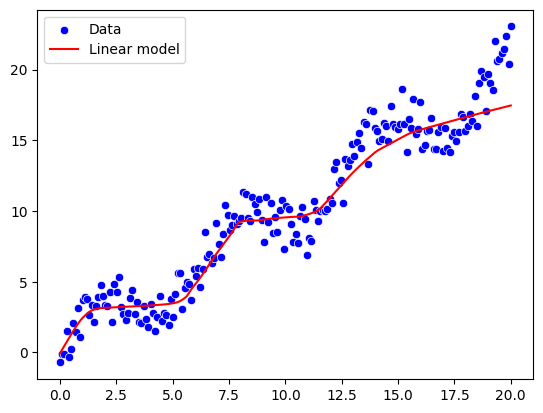

In [119]:
sns.scatterplot(x=X,y=y , color='blue',label='Data')
sns.lineplot(x=X,y=y_pred_m2.ravel(),color='red',label='Linear model')
